In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

!pip install yfinance
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
nbconvert 6.4.5 requires nbformat>=4.4, but you have nbformat 4.2.0 which is incompatible.

Looking for: ['bs4==4.10.0']

[+] 0.0s
rapidsai/linux-64 ━━━━━━━━━━━╸━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.0s[+] 0.1s
rapidsai/linux-64    ━━━━━━━━━╸━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
rapidsai/noarch      ━━━━━━━━━━━━━━╸━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
nvidia/linux-64      ━━━━━━━╸━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
nvid

## Importing the required libraries used for the below project

In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install html5lib

In [30]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Reading the data set into the variable Tesla, using the Ticker module from yfinance.

> 

In [31]:
tesla = yf.Ticker('TSLA')

In [32]:
tesla_data = tesla.history(period = 'max')

In [38]:
tesla_data.reset_index(inplace = True)

In [34]:
import seaborn as sns

In [40]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500


## Description of the above columns
1. Date = The date for which the data of stocks were recorded
2. Open = Opening price of the stock
3. High = Highest price that the stock achieved in that day
4. Low = Lowest price that the stock achieved in that day
5. Close = The closing price of the stock on that day
6. Volume = The amount of stocks traded in that day.

In [41]:
tesla_data.drop(['Date'], axis = 1, inplace = True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


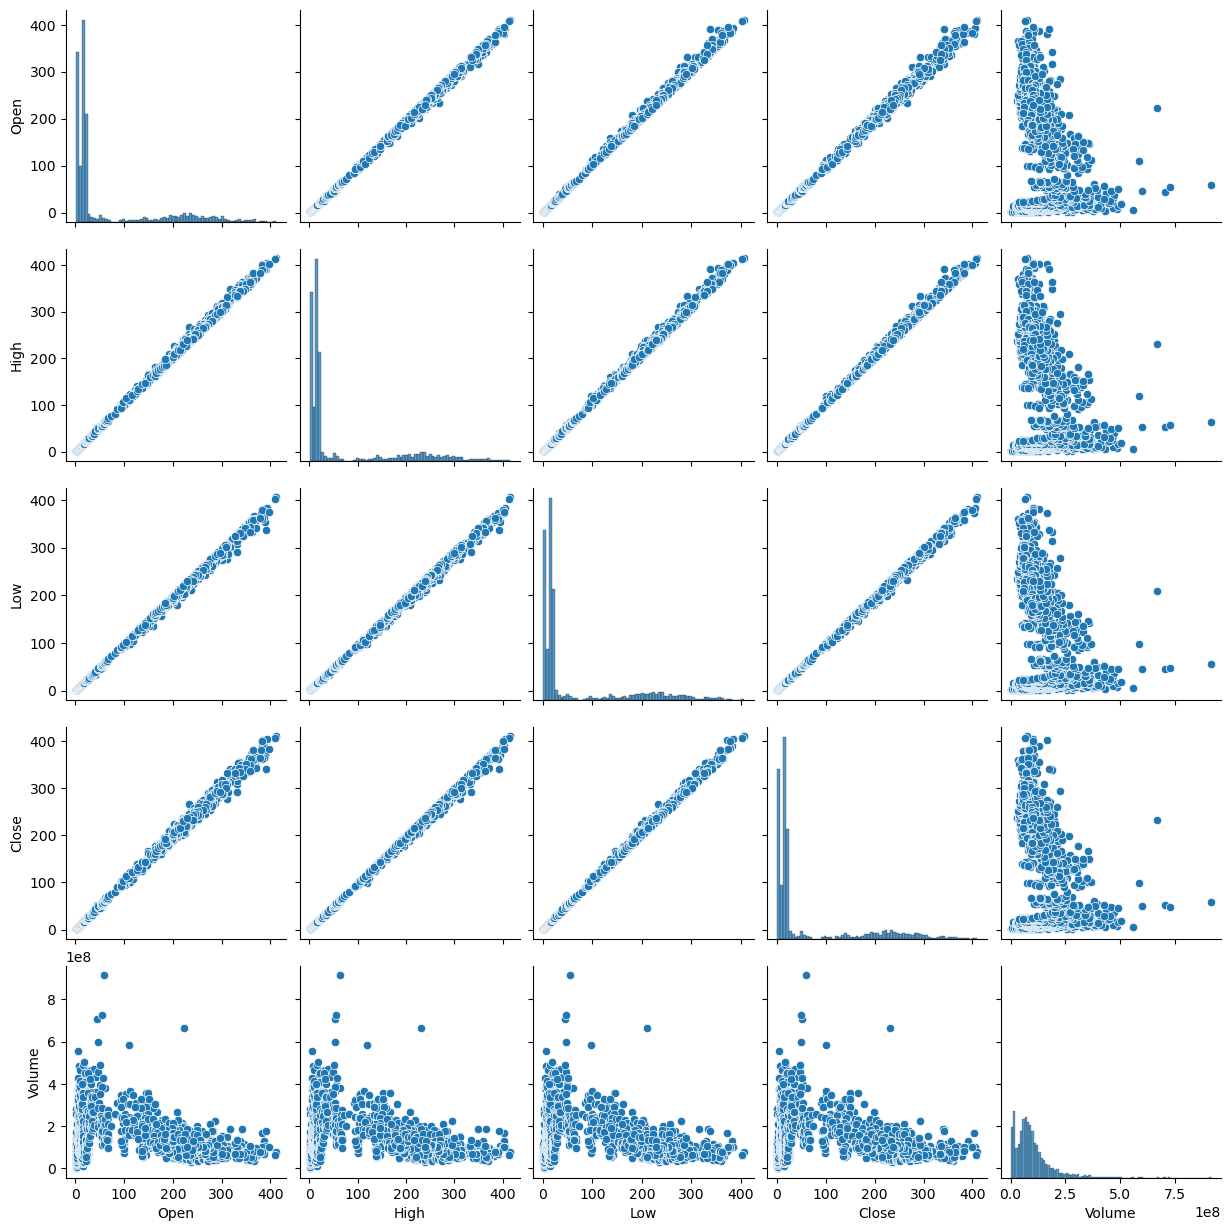

In [43]:
sns.pairplot(tesla_data)

Training and testing the model using the above data

In [44]:
x = tesla_data[['Open','High','Low', 'Volume']]
y = tesla_data[['Close']]

In [46]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Here, the training data is 80% of the total data and testing data is 20% of the original data

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [52]:
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()

In [57]:
lm.fit(x_train,y_train)

LinearRegression()

Predicting the R^2 value for the above model using the test data

In [59]:
lm.score(x_test, y_test)

0.9996921751923044

Predicting the coefficients

In [60]:
lm.coef_

array([[-7.05538695e-01,  8.59488213e-01,  8.46705334e-01,
         7.13098358e-10]])

In [61]:
lm.intercept_

array([-0.04924451])

In [79]:
yhat = lm.predict(x_test)
yhat[0:5]

array([[14.39652609],
       [18.02628093],
       [13.01560888],
       [15.01224451],
       [10.91828518]])

Text(0.5, 1.0, 'Graph between test data (close) and Predicted data(close)')

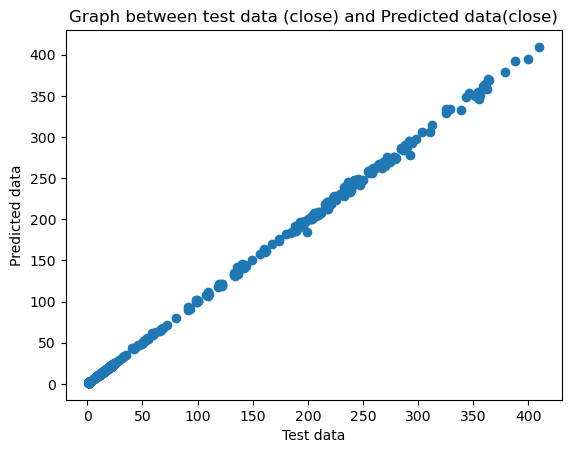

In [63]:
plt.scatter(y_test, yhat)
plt.xlabel('Test data')
plt.ylabel('Predicted data')
plt.title('Graph between test data (close) and Predicted data(close)')

In [64]:
tesla_data.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


In [65]:
test_values = [[1.5333,1.5400, 1.2473, 77097000]]
prediction = lm.predict(test_values)
prediction

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.30363817]])

Here, the predicted value is 1.3036 which is almst close to the actual value i.e 1.28

/tmp/ipykernel_32/1076658346.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist =False, color = 'r', label = 'Actual Values')
/tmp/ipykernel_32/1076658346.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist = False, color = 'b', ax = ax1)


<Axes: ylabel='Density'>

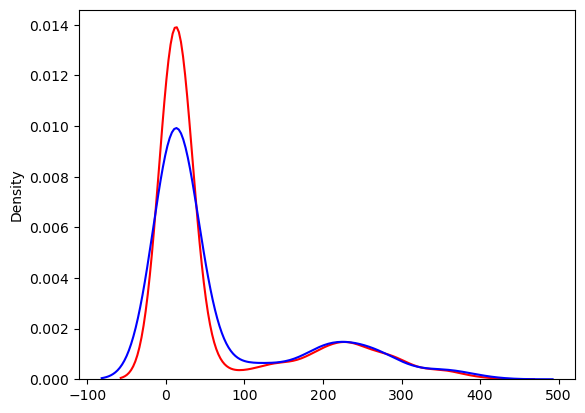

In [78]:
ax1 = sns.distplot(y, hist =False, color = 'r', label = 'Actual Values')
sns.distplot(yhat, hist = False, color = 'b', ax = ax1)

In [68]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,yhat)

In [69]:
MSE

3.1520606484919536

For the MLR (Multiple linear regression model), the MSE (mean squared error) is very less and R^2 value is almost equal to 1, which implies that our model can predict almost correct values for out of sample data. 